# 원본 코드
* https://colab.research.google.com/drive/1BzfjY6arz8qK7kLZz-15A95rtsf7-lpY#scrollTo=uOvO1x9hPXze

In [1]:
## load required python packages
import pandas as pd
import numpy as np

from pygam import LinearGAM, LogisticGAM

import matplotlib.pyplot as plt

In [2]:
redwine_url = 'https://raw.githubusercontent.com/ianshan0915/medium-articles/master/data/redwine-quality.csv'
redwine = pd.read_csv(redwine_url)

In [3]:
redwine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
redwine.shape

(1599, 12)

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(redwine.sample(frac=0.1), explorative=True)
#Saving results to a HTML file
profile.to_file("redwine_profile.html")

In [6]:
redwine_X = redwine.drop(['quality'], axis=1).values
redwine_y = redwine['quality']

In [7]:
display(redwine_X.shape)
display(redwine_X)

(1599, 11)

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [8]:
display(redwine_y.shape)
display(redwine_y)

(1599,)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [9]:
lams = np.random.rand(100, 11)
lams = lams * 11 - 3
lams = np.exp(lams)
print(lams.shape)
gam = LinearGAM(n_splines=10).gridsearch(redwine_X, redwine_y, lam=lams)

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

(100, 11)


100% (100 of 100) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


In [17]:
i = np.range(1,10)
XX = gam.generate_X_grid(term=i[0])

AttributeError: module 'numpy' has no attribute 'range'

<Figure size 432x288 with 0 Axes>

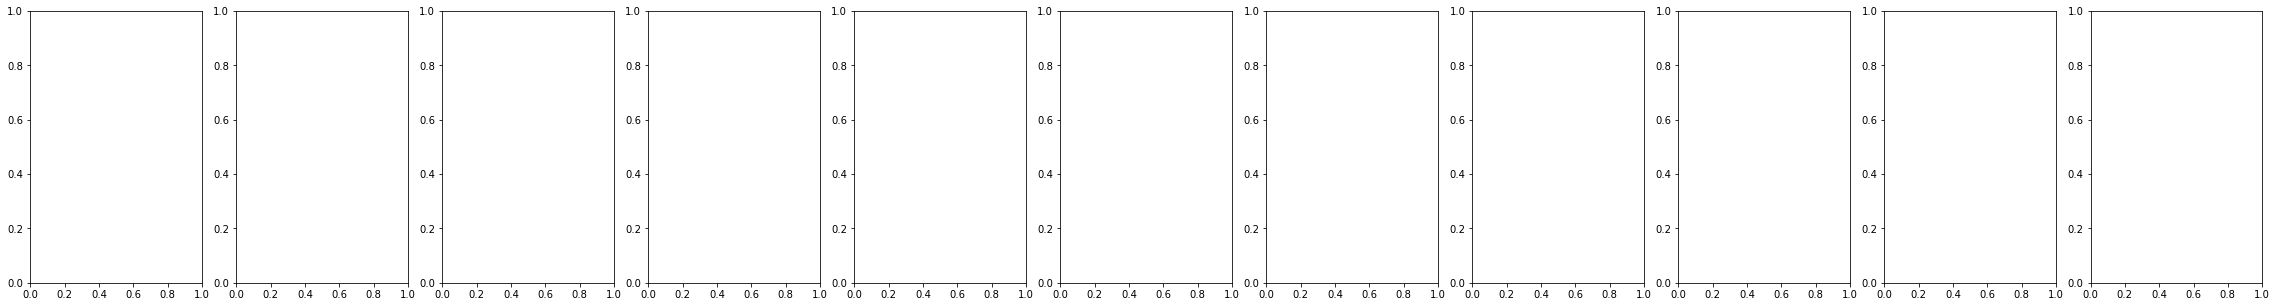

In [12]:
titles = redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,11,figsize=(40, 5))

In [14]:
for i, ax in np.arange(axs):
    print(i)

TypeError: unsupported operand type(s) for -: 'AxesSubplot' and 'int'

TypeError: unsupported operand type(s) for -: 'AxesSubplot' and 'int'

<Figure size 432x288 with 0 Axes>

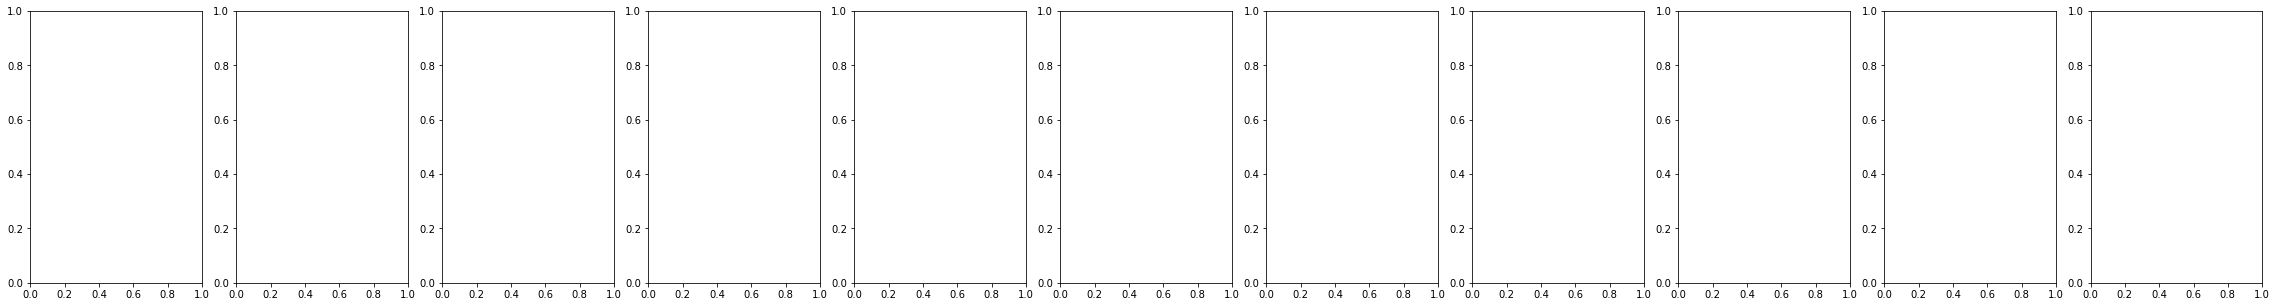

In [11]:
for i, ax in np.arange(axs):
    #m.gridsearch(X[:, None], Y, lam=np.arange(5, 31, 5), n_splines=range(5, 31, 5))
    #m.gridsearch(X[:, None], Y, lam=np.arange(5, 31, 5), n_splines=np.arange(5, 31, 5))


    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

In [ ]:
from pygam import LogisticGAM, s, f
from pygam.datasets import default

X, y = default(return_X_y=True)

gam = LogisticGAM(f(0) + s(1) + s(2)).gridsearch(X, y)

fig, axs = plt.subplots(1, 3)
titles = ['student', 'balance', 'income']

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);